<a href="https://colab.research.google.com/github/berliandiwa/Text-Analysis/blob/main/Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.cloud import bigquery
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/BITLABS/private-key.json"

In [ ]:
bigclient = bigquery.Client()
query_string1 = """
SELECT * FROM `bitlabs-dab.finalexam.main_data`
"""

main_data =(
bigclient.query(query_string1)
.result()
.to_dataframe(
))

In [ ]:
query_string2 = """
SELECT * FROM `bitlabs-dab.finalexam.detail`
"""

detail = (
bigclient.query(query_string2)
.result()
.to_dataframe(
))

query_string3 = """
SELECT * FROM `bitlabs-dab.finalexam.status`
"""

status = (
bigclient.query(query_string3)
.result()
.to_dataframe(
))


Melihat 5 data teratas dari masing-masing tabel :

In [ ]:
main_data.head()

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender
0,C000295,ASR,I'm finding the academic workload really overw...,None,0.69,1,1,F
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,None,3.71,1,1,M
2,C000184,ASR,The limited access to academic advisors is mak...,None,3.56,1,1,F
3,C000256,ASR,I am finding it difficult to complete my assig...,None,2.45,1,1,F
4,C000320,ASR,The stress and anxiety of college life has bee...,None,3.52,1,1,M


In [ ]:
detail.head()

,type_complaint_code,type_complaint
0,ASR,Academic Support and Resources
1,ANS,Athletics and sports
2,ANT,Activities and Travelling
3,CRO,Career opportunities
4,FNC,Food and Cantines


In [ ]:
status.head()

,complaint-ID,status
0,C000269,None
1,C000014,None
2,C000152,None
3,C000442,None
4,C000485,None


Menggabungkan tabel main_data dengan tabel status.

In [ ]:
# Me-rename nama kolom complaint-ID pada tabel status agar dapat di merge dengan tabel main_data
status = status.rename(columns = {'complaint-ID':'complaint_ID'})

In [ ]:
status.head()

,complaint_ID,status
0,C000269,None
1,C000014,None
2,C000152,None
3,C000442,None
4,C000485,None


In [ ]:
main_data = main_data.merge(status, on='complaint_ID',how='left')
main_data.head()

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status
0,C000295,ASR,I'm finding the academic workload really overw...,None,0.69,1,1,F,PROCESS
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,None,3.71,1,1,M,CLOSE
2,C000184,ASR,The limited access to academic advisors is mak...,None,3.56,1,1,F,OPEN
3,C000256,ASR,I am finding it difficult to complete my assig...,None,2.45,1,1,F,None
4,C000320,ASR,The stress and anxiety of college life has bee...,None,3.52,1,1,M,PROCESS


Menambahkan type complaint pada tabel sehingga dapat mudah terbaca

In [ ]:
main_data = main_data.merge(detail, on='type_complaint_code',how='left')
main_data.head()

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,None,0.69,1,1,F,PROCESS,Academic Support and Resources
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,None,3.71,1,1,M,CLOSE,Academic Support and Resources
2,C000184,ASR,The limited access to academic advisors is mak...,None,3.56,1,1,F,OPEN,Academic Support and Resources
3,C000256,ASR,I am finding it difficult to complete my assig...,None,2.45,1,1,F,None,Academic Support and Resources
4,C000320,ASR,The stress and anxiety of college life has bee...,None,3.52,1,1,M,PROCESS,Academic Support and Resources


Melihat tipe data pada masing-masing kolom

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   complaint_ID         1009 non-null   object
 1   type_complaint_code  1009 non-null   object
 2   reports              1009 non-null   object
 3   age                  981 non-null    object
 4   gpa                  1009 non-null   object
 5   year                 1009 non-null   object
 6   count                1009 non-null   object
 7   gender               1009 non-null   object
 8   status               991 non-null    object
 9   type_complaint       1009 non-null   object
dtypes: object(10)
memory usage: 86.7+ KB


# Data Cleansing

Mengganti tipe data pada kolom age menjadi integer, gpa menjadi float, year menjadi integer, dan count menjadi integer

In [ ]:
main_data['age'] = pd.to_numeric(main_data['age'])
main_data['gpa'] = main_data['gpa'].astype(float)
main_data['year'] = main_data['year'].astype(int)
main_data['count'] = main_data['count'].astype(int)

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaint_ID         1009 non-null   object 
 1   type_complaint_code  1009 non-null   object 
 2   reports              1009 non-null   object 
 3   age                  981 non-null    float64
 4   gpa                  1009 non-null   float64
 5   year                 1009 non-null   int64  
 6   count                1009 non-null   int64  
 7   gender               1009 non-null   object 
 8   status               991 non-null    object 
 9   type_complaint       1009 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 86.7+ KB


In [ ]:
main_data.head()

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,NaN,0.69,1,1,F,PROCESS,Academic Support and Resources
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,NaN,3.71,1,1,M,CLOSE,Academic Support and Resources
2,C000184,ASR,The limited access to academic advisors is mak...,NaN,3.56,1,1,F,OPEN,Academic Support and Resources
3,C000256,ASR,I am finding it difficult to complete my assig...,NaN,2.45,1,1,F,None,Academic Support and Resources
4,C000320,ASR,The stress and anxiety of college life has bee...,NaN,3.52,1,1,M,PROCESS,Academic Support and Resources


Mengecek duplikat pada data :

In [ ]:
main_data.duplicated().sum()

4

In [ ]:
main_data[main_data.duplicated()]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
161,C000756,CRO,Finding job opportunities has been a challenge...,17.0,1.13,5,1,M,CLOSE,Career opportunities
353,C001245,ISE,"16. ""I wish there were more opportunities for ...",19.0,2.57,5,1,F,CLOSE,International student experiences
556,C000231,ASR,The limited access to research databases and m...,22.0,1.86,1,1,M,CLOSE,Academic Support and Resources
570,C101331,ONL,Limited availability of professors during onli...,22.0,3.00,2,1,F,CLOSE,Online learning


In [ ]:
main_data[main_data['complaint_ID']=="C001245"]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
352,C001245,ISE,"16. ""I wish there were more opportunities for ...",19.0,2.57,5,1,F,CLOSE,International student experiences
353,C001245,ISE,"16. ""I wish there were more opportunities for ...",19.0,2.57,5,1,F,CLOSE,International student experiences


Menghapus data yang terduplikasi

In [ ]:
main_data = main_data.drop(index=[161,353,556,570])

In [ ]:
main_data.duplicated().sum()

0

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaint_ID         1005 non-null   object 
 1   type_complaint_code  1005 non-null   object 
 2   reports              1005 non-null   object 
 3   age                  977 non-null    float64
 4   gpa                  1005 non-null   float64
 5   year                 1005 non-null   int64  
 6   count                1005 non-null   int64  
 7   gender               1005 non-null   object 
 8   status               987 non-null    object 
 9   type_complaint       1005 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 86.4+ KB


Melihat seberapa banyak data yang null pada masing-masing kolom

In [ ]:
main_data.isnull().sum()

complaint_ID            0
type_complaint_code     0
reports                 0
age                    28
gpa                     0
year                    0
count                   0
gender                  0
status                 18
type_complaint          0
dtype: int64

In [ ]:
main_data['age'].isnull().sum()/len(main_data)*100

2.7860696517412937

<Axes: >

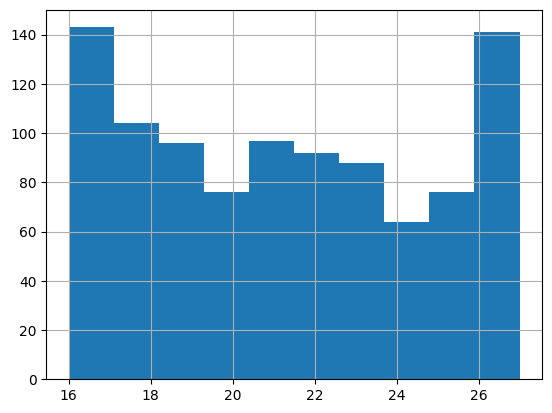

In [ ]:
main_data['age'].hist()

Dikarenakan kolom age terdapat data yang null, sebesar 2,7% sehingga data yang null akan diisi menggunakan mean karena data terdistribusi merata (tidak skewed). Pengisian tersebut dilakukan karena ke-28 data sangat dibutuhkan untuk proses analisis dan disayangkan jika dihapus karena data age-nya kosong.

In [ ]:
main_data['age']=main_data['age'].fillna(main_data['age'].mean())

In [ ]:
main_data

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,21.308086,0.69,1,1,F,PROCESS,Academic Support and Resources
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21.308086,3.71,1,1,M,CLOSE,Academic Support and Resources
2,C000184,ASR,The limited access to academic advisors is mak...,21.308086,3.56,1,1,F,OPEN,Academic Support and Resources
3,C000256,ASR,I am finding it difficult to complete my assig...,21.308086,2.45,1,1,F,None,Academic Support and Resources
4,C000320,ASR,The stress and anxiety of college life has bee...,21.308086,3.52,1,1,M,PROCESS,Academic Support and Resources
...,...,...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27.000000,3.09,5,1,F,PROCESS,Health and Well-being Support
1005,C001478,STA,"""The lack of transparency in the student affai...",27.000000,2.37,5,1,M,OPEN,Student Affairs
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27.000000,2.66,5,1,M,CLOSE,Housing and Transportation
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27.000000,0.03,5,1,F,PROCESS,International student experiences


Untuk kolom status, data yang null akan dihapus karena jika diisi dengan modus(), ditakutkan tidak sesuai dengan kondisi yang sebenarnya dan ditakutkan dapat terjadi kesalahan analisis. Selain itu. data yang null hanya sebesar 1,7%, sehingga tidak akan terlalu mempengaruhi hasil analisis.

In [ ]:
# Melihat presentase data status yang null
main_data['status'].isnull().sum()/len(main_data)*100

1.791044776119403

In [ ]:
# Menghapus data pada kolom status yang bernilai null
main_data = main_data.dropna(subset='status')

In [ ]:
main_data.isnull().sum()

complaint_ID           0
type_complaint_code    0
reports                0
age                    0
gpa                    0
year                   0
count                  0
gender                 0
status                 0
type_complaint         0
dtype: int64

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaint_ID         987 non-null    object 
 1   type_complaint_code  987 non-null    object 
 2   reports              987 non-null    object 
 3   age                  987 non-null    float64
 4   gpa                  987 non-null    float64
 5   year                 987 non-null    int64  
 6   count                987 non-null    int64  
 7   gender               987 non-null    object 
 8   status               987 non-null    object 
 9   type_complaint       987 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 84.8+ KB


Missing value pada tabel main_data berhasil tertangani.

Cek outlier data

<Axes: xlabel='age'>

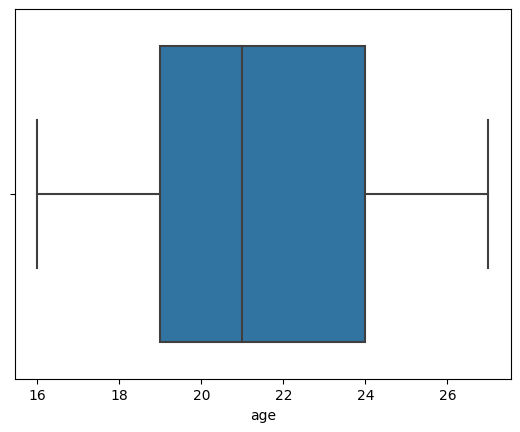

In [ ]:
sns.boxplot(data=main_data,x='age')

<Axes: xlabel='gpa'>

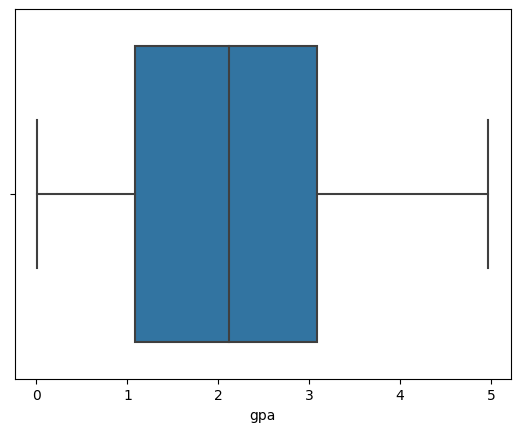

In [ ]:
sns.boxplot(data=main_data,x='gpa')

Terdapat kejanggalan pada outlier gpa, karena nilai max gpa nya sampai ke nilai ke-5. Akan tetapi, karena saya tidak bisa memastikan kebenarannya, saya memutuskan untuk membiarkannya saja.

<Axes: xlabel='year'>

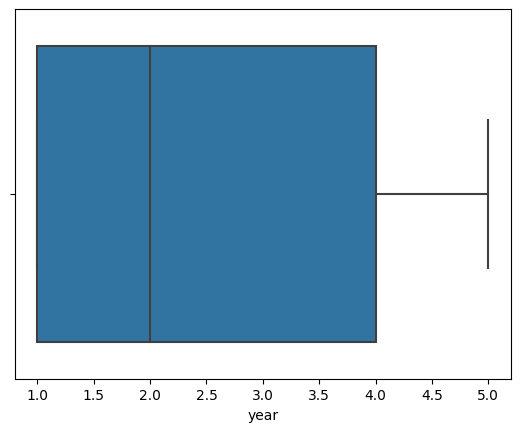

In [ ]:
sns.boxplot(data=main_data,x='year')

<Axes: xlabel='count'>

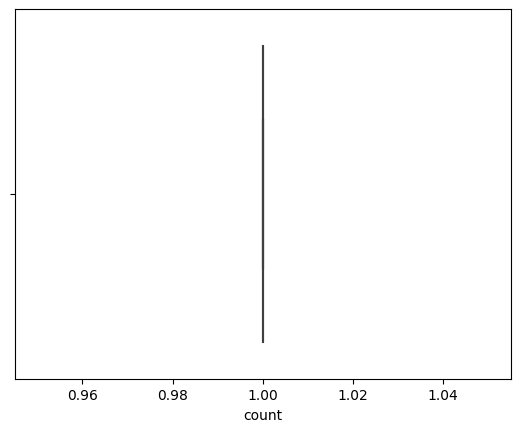

In [ ]:
sns.boxplot(data=main_data,x='count')

# Eksploratory Data Analysis

Melihat distribusi data

In [ ]:
main_data.describe(include='all')

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
count,987,987,987,987.000000,987.000000,987.000000,987.0,987,987,987
unique,987,11,981,NaN,NaN,NaN,NaN,2,3,11
top,C000295,ASR,It's frustrating that my health insurance does...,NaN,NaN,NaN,NaN,F,CLOSE,Academic Support and Resources
freq,1,226,2,NaN,NaN,NaN,NaN,535,453,226
mean,NaN,NaN,NaN,21.293830,2.094073,2.689970,1.0,NaN,NaN,NaN
std,NaN,NaN,NaN,3.286405,1.208466,1.463252,0.0,NaN,NaN,NaN
min,NaN,NaN,NaN,16.000000,0.010000,1.000000,1.0,NaN,NaN,NaN
25%,NaN,NaN,NaN,19.000000,1.085000,1.000000,1.0,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.000000,2.120000,2.000000,1.0,NaN,NaN,NaN
75%,NaN,NaN,NaN,24.000000,3.090000,4.000000,1.0,NaN,NaN,NaN


Berdasarkan hasil deskripsi diatas, complain banyak yang berisi dari tipe academic support and resources, dengan status "close". Mahasiswa yang mengajukan report mayoritas merupakan mahasiswa berjenis kelamin perempuan dan rata-rata umurnya 21 tahun, serta rata-rata gpa nya senilai 2,09. Selain itu, mayoritas mahasiswa yang mengajukan report merupakan mahasiswa dengan tahun belajar 2-3 tahun.

<Axes: xlabel='gender', ylabel='gpa'>

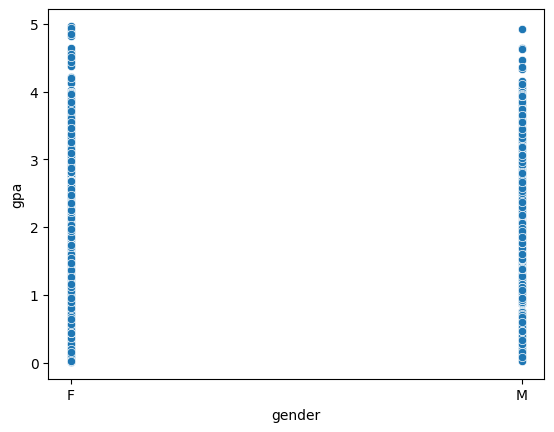

In [ ]:
sns.scatterplot(x="gender", y="gpa",data=main_data)

Melihat jumlah report pada setiap type complaint :

In [ ]:
main_data['type_complaint'].value_counts()

Academic Support and Resources       226
Food and Cantines                    138
Financial Support                     91
Online learning                       90
Career opportunities                  89
International student experiences     86
Athletics and sports                  77
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: type_complaint, dtype: int64

Melihat jumlah report berdasarkan tipe complain dan status :

In [ ]:
type_reports = pd.pivot_table(
    data=main_data,
    index='type_complaint_code',
    columns = 'status',
    values = 'complaint_ID',
    aggfunc = 'nunique'
).reset_index()

type_reports

status,type_complaint_code,CLOSE,OPEN,PROCESS
0,ANS,38,20,19
1,ANT,18,3,19
2,ASR,86,43,97
3,CRO,48,18,23
4,FNC,64,28,46
5,FNS,47,19,25
6,HNT,35,12,17
7,HWS,19,9,25
8,ISE,37,21,28
9,ONL,47,16,27


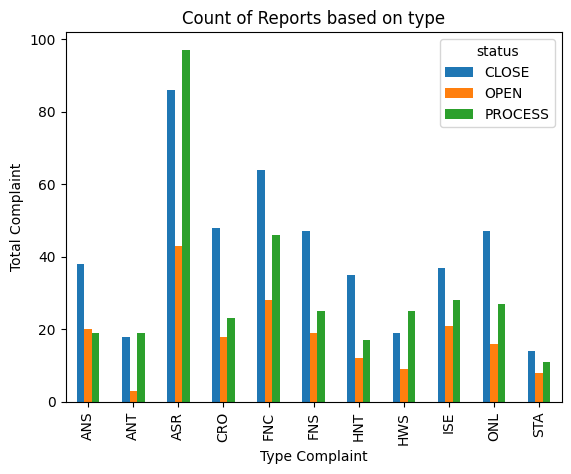

In [ ]:
type_reports.plot(kind='bar',x='type_complaint_code')
plt.xlabel("Type Complaint")
plt.ylabel("Total Complaint")
plt.title("Count of Reports based on type")
# display the plot
plt.show()

Dikarenakan mayoritas report berasa dari department Academic Support and Resource serta sebagian besar reports masih di proses, sehingga analisis akan berfokus pada reports di department tersebut.

In [ ]:
type1 = main_data[main_data['type_complaint_code']=='ASR']
type1.head()

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,21.308086,0.69,1,1,F,PROCESS,Academic Support and Resources
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21.308086,3.71,1,1,M,CLOSE,Academic Support and Resources
2,C000184,ASR,The limited access to academic advisors is mak...,21.308086,3.56,1,1,F,OPEN,Academic Support and Resources
4,C000320,ASR,The stress and anxiety of college life has bee...,21.308086,3.52,1,1,M,PROCESS,Academic Support and Resources
5,C100335,ASR,The academic workload is becoming overwhelming...,21.308086,1.02,1,1,F,PROCESS,Academic Support and Resources


In [ ]:
# Jumlah mahasiswa yang report untuk department ASR berdasarkan gender
type1_gender = pd.pivot_table(
    data=type1,
    index='gender',
    values = 'complaint_ID',
    aggfunc = 'nunique'
).reset_index()

type1_gender

,gender,complaint_ID
0,F,122
1,M,104


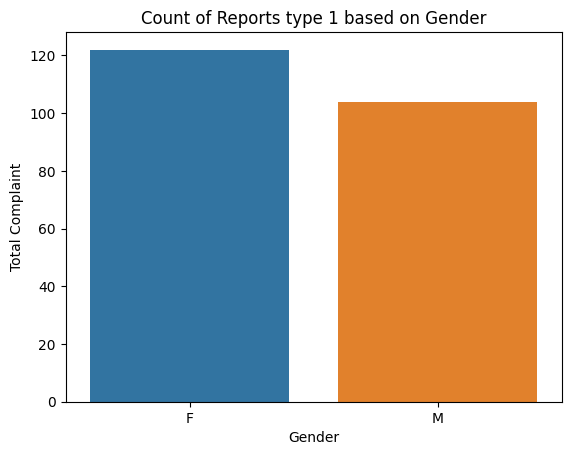

In [ ]:
sns.barplot(x='gender',y='complaint_ID',data=type1_gender)
plt.xlabel("Gender")
plt.ylabel("Total Complaint")
plt.title("Count of Reports type 1 based on Gender")
# display the plot
plt.show()

In [ ]:
# Jumlah report untuk department ASR berdasarkan tahun belajar
type1_year = pd.pivot_table(
    data=type1,
    index='year',
    values = 'complaint_ID',
    aggfunc = 'nunique'
).reset_index()

type1_year

,year,complaint_ID
0,1,159
1,2,67


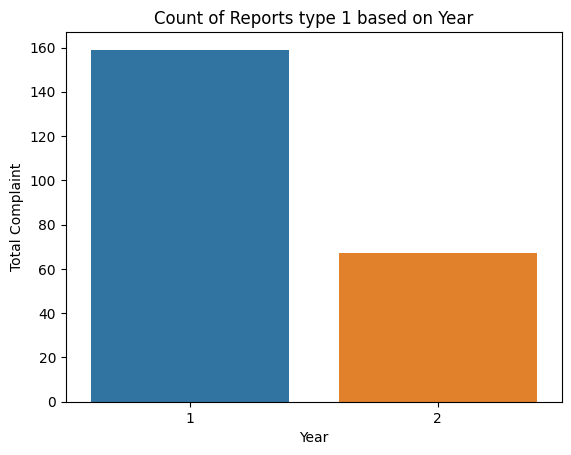

In [ ]:
sns.barplot(x='year',y='complaint_ID',data=type1_year)
plt.xlabel("Year")
plt.ylabel("Total Complaint")
plt.title("Count of Reports type 1 based on Year")
# display the plot
plt.show()

Persebaran gpa untuk mahasiswa yang report pada department academic

In [ ]:
type1['gpa'].mean()

1.9343362831858406

<Axes: xlabel='gender', ylabel='gpa'>

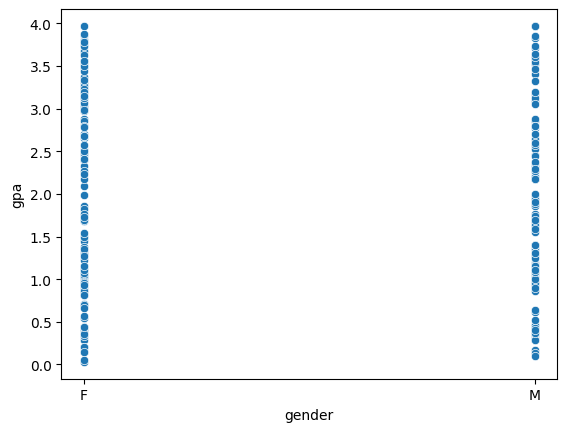

In [ ]:
sns.scatterplot(x="gender", y="gpa", data=type1)

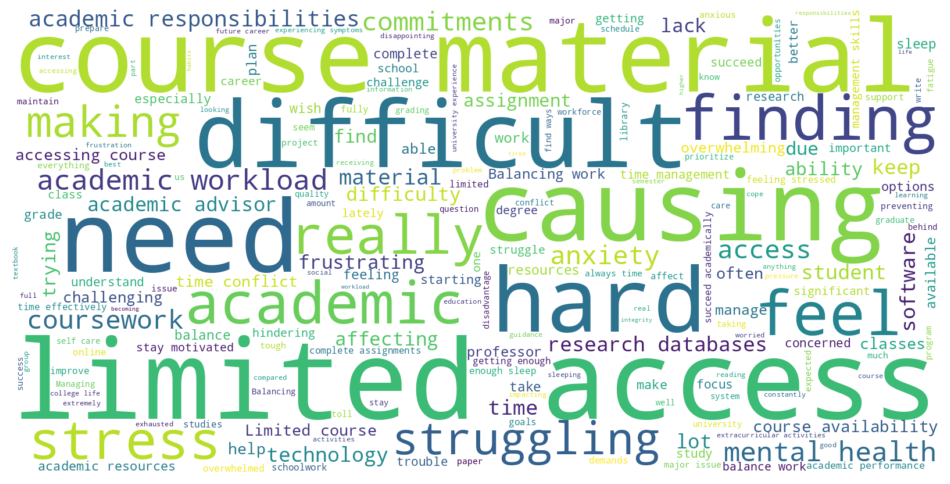

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white')
reports_segmen1 = ' '.join(type1['reports'])
wordcloud.generate(reports_segmen1)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
lim = type1['reports'].str.contains(".limited access")
type1[lim]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
2,C000184,ASR,The limited access to academic advisors is mak...,21.308086,3.56,1,1,F,OPEN,Academic Support and Resources
29,C000282,ASR,I am finding it difficult to complete my assig...,16.000000,1.28,1,1,M,PROCESS,Academic Support and Resources
114,C100202,ASR,I'm worried about the quality of my research p...,17.000000,2.33,1,1,M,CLOSE,Academic Support and Resources
128,C000293,ASR,The limited access to research databases and m...,17.000000,0.64,1,1,M,CLOSE,Academic Support and Resources
140,C000123,ASR,The limited access to research databases and m...,17.000000,3.27,2,1,F,CLOSE,Academic Support and Resources
180,C000211,ASR,The limited access to technology and software ...,18.000000,2.36,1,1,M,PROCESS,Academic Support and Resources
184,C100282,ASR,The limited access to academic resources is ma...,18.000000,3.08,1,1,F,OPEN,Academic Support and Resources
185,C000254,ASR,The limited access to academic resources is pr...,18.000000,1.45,1,1,F,CLOSE,Academic Support and Resources
206,C100184,ASR,I'm struggling to find the necessary course ma...,18.000000,2.51,1,1,F,OPEN,Academic Support and Resources
296,C000139,ASR,The limited access to research databases and m...,19.000000,0.30,2,1,M,OPEN,Academic Support and Resources


In [ ]:
course = type1['reports'].str.contains(".course")
type1[course]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
4,C000320,ASR,The stress and anxiety of college life has bee...,21.308086,3.52,1,1,M,PROCESS,Academic Support and Resources
5,C100335,ASR,The academic workload is becoming overwhelming...,21.308086,1.02,1,1,F,PROCESS,Academic Support and Resources
8,C000221,ASR,I'm struggling to keep up with my coursework d...,21.308086,1.31,1,1,M,OPEN,Academic Support and Resources
12,C000018,ASR,There have been several honor code violations ...,21.308086,3.30,2,1,F,PROCESS,Academic Support and Resources
13,C000061,ASR,The professor for this course is disinterested...,21.308086,3.14,2,1,F,PROCESS,Academic Support and Resources
...,...,...,...,...,...,...,...,...,...,...
966,C000055,ASR,The professor for this course is not approacha...,27.000000,3.12,2,1,F,CLOSE,Academic Support and Resources
969,C100123,ASR,Limited access to technology and software is a...,27.000000,0.52,2,1,M,CLOSE,Academic Support and Resources
970,C000051,ASR,-The-workload-for-this-course-is-overwhelming....,27.000000,0.81,2,1,F,PROCESS,Academic Support and Resources
972,C000027,ASR,The textbooks for this course are outdated and...,27.000000,3.15,2,1,F,OPEN,Academic Support and Resources


Isi reports pada department ASR yang berstatus "open"

In [ ]:
type1_open = type1[type1['status']=='OPEN']
type1_open

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
2,C000184,ASR,The limited access to academic advisors is mak...,21.308086,3.56,1,1,F,OPEN,Academic Support and Resources
8,C000221,ASR,I'm struggling to keep up with my coursework d...,21.308086,1.31,1,1,M,OPEN,Academic Support and Resources
9,C000380,ASR,I have been finding it difficult to balance my...,21.308086,2.85,1,1,M,OPEN,Academic Support and Resources
28,C000154,ASR,Limited course availability is impacting our a...,16.000000,1.19,1,1,M,OPEN,Academic Support and Resources
44,C000458,ASR,I'm struggling with mental health issues that ...,16.000000,2.27,1,1,M,OPEN,Academic Support and Resources
50,C000241,ASR,I am paying a significant amount for tuition a...,16.000000,0.86,1,1,M,OPEN,Academic Support and Resources
67,C000038,ASR,The professor for this course is disorganized ...,16.000000,3.97,2,1,M,OPEN,Academic Support and Resources
72,C000130,ASR,It's-really-frustrating-to-have-limited-access...,16.000000,1.12,2,1,F,OPEN,Academic Support and Resources
111,C000216,ASR,Limited access to academic advisors is causing...,17.000000,1.60,1,1,M,OPEN,Academic Support and Resources
117,C000247,ASR,Limited access to academic resources has made ...,17.000000,0.44,1,1,F,OPEN,Academic Support and Resources


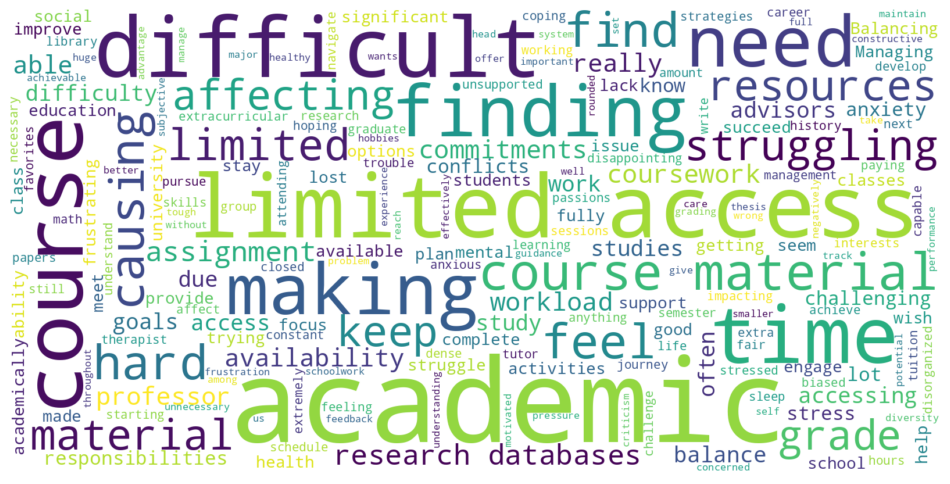

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white')
reports_segmen1_open = ' '.join(type1_open['reports'])
wordcloud.generate(reports_segmen1_open)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
academic = type1_open['reports'].str.contains('.academic')

In [ ]:
type1_open[academic]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
2,C000184,ASR,The limited access to academic advisors is mak...,21.308086,3.56,1,1,F,OPEN,Academic Support and Resources
9,C000380,ASR,I have been finding it difficult to balance my...,21.308086,2.85,1,1,M,OPEN,Academic Support and Resources
28,C000154,ASR,Limited course availability is impacting our a...,16.000000,1.19,1,1,M,OPEN,Academic Support and Resources
111,C000216,ASR,Limited access to academic advisors is causing...,17.000000,1.60,1,1,M,OPEN,Academic Support and Resources
117,C000247,ASR,Limited access to academic resources has made ...,17.000000,0.44,1,1,F,OPEN,Academic Support and Resources
172,C000338,ASR,Managing the academic workload and the difficu...,18.000000,0.84,1,1,F,OPEN,Academic Support and Resources
184,C100282,ASR,The limited access to academic resources is ma...,18.000000,3.08,1,1,F,OPEN,Academic Support and Resources
187,C000424,ASR,Balancing work and academic responsibilities h...,18.000000,2.97,1,1,F,OPEN,Academic Support and Resources
286,C100269,ASR,Limited access to academic resources is causin...,19.000000,3.51,1,1,F,OPEN,Academic Support and Resources
296,C000139,ASR,The limited access to research databases and m...,19.000000,0.30,2,1,M,OPEN,Academic Support and Resources


In [ ]:
type1_process = type1[type1['status']=='PROCESS']
type1_process

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,21.308086,0.69,1,1,F,PROCESS,Academic Support and Resources
4,C000320,ASR,The stress and anxiety of college life has bee...,21.308086,3.52,1,1,M,PROCESS,Academic Support and Resources
5,C100335,ASR,The academic workload is becoming overwhelming...,21.308086,1.02,1,1,F,PROCESS,Academic Support and Resources
6,C100421,ASR,"The academic workload is overwhelming, and I a...",21.308086,3.76,1,1,F,PROCESS,Academic Support and Resources
12,C000018,ASR,There have been several honor code violations ...,21.308086,3.30,2,1,F,PROCESS,Academic Support and Resources
...,...,...,...,...,...,...,...,...,...,...
953,C000307,ASR,Lack of sleep and fatigue has been a real issu...,27.000000,1.40,1,1,M,PROCESS,Academic Support and Resources
960,C000207,ASR,Limited course availability is causing me to m...,27.000000,2.57,1,1,F,PROCESS,Academic Support and Resources
967,C000106,ASR,It's hard to do group projects when we have li...,27.000000,1.16,2,1,F,PROCESS,Academic Support and Resources
970,C000051,ASR,-The-workload-for-this-course-is-overwhelming....,27.000000,0.81,2,1,F,PROCESS,Academic Support and Resources


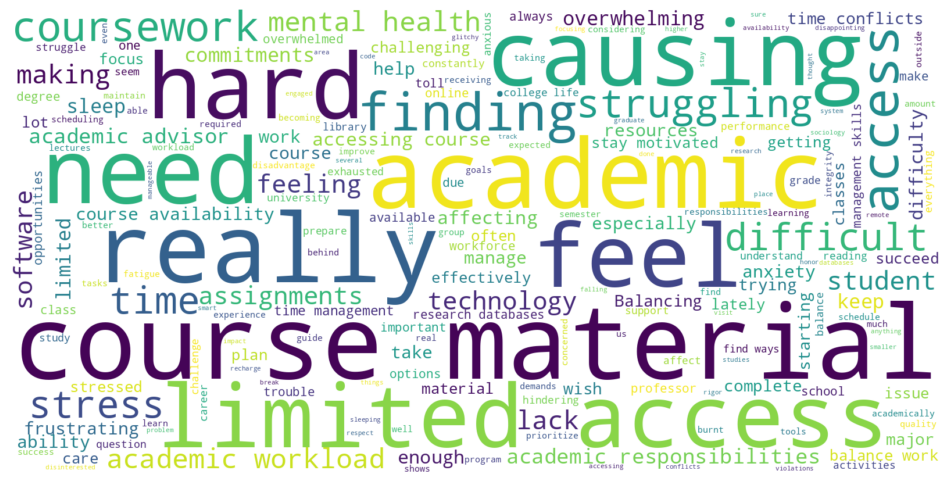

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white')
reports_segmen1_process = ' '.join(type1_process['reports'])
wordcloud.generate(reports_segmen1_process)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
feel = type1_process['reports'].str.contains('.really')
type1_process[feel]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,21.308086,0.69,1,1,F,PROCESS,Academic Support and Resources
12,C000018,ASR,There have been several honor code violations ...,21.308086,3.30,2,1,F,PROCESS,Academic Support and Resources
15,C100122,ASR,I'm really struggling with finding and accessi...,21.308086,0.95,2,1,F,PROCESS,Academic Support and Resources
38,C000323,ASR,I'm-feeling-really-overwhelmed-by-the-academic...,16.000000,1.32,1,1,F,PROCESS,Academic Support and Resources
43,C000331,ASR,"The course material is really challenging, and...",16.000000,0.32,1,1,M,PROCESS,Academic Support and Resources
115,C100320,ASR,I've been feeling really tired and burnt out l...,17.000000,0.62,1,1,M,PROCESS,Academic Support and Resources
132,C100166,ASR,The-difficulty-in-finding-and-accessing-course...,17.000000,0.70,1,1,F,PROCESS,Academic Support and Resources
134,C000141,ASR,It's-really-hard-to-succeed-academically-when-...,17.000000,2.80,2,1,F,PROCESS,Academic Support and Resources
176,C100324,ASR,"The course material is really difficult, and I...",18.000000,3.55,1,1,F,PROCESS,Academic Support and Resources
181,C000309,ASR,I've been dealing with a lot of stress and anx...,18.000000,0.96,1,1,M,PROCESS,Academic Support and Resources


In [ ]:
material = type1_process['reports'].str.contains('.course')
type1_process[material]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
4,C000320,ASR,The stress and anxiety of college life has bee...,21.308086,3.52,1,1,M,PROCESS,Academic Support and Resources
5,C100335,ASR,The academic workload is becoming overwhelming...,21.308086,1.02,1,1,F,PROCESS,Academic Support and Resources
12,C000018,ASR,There have been several honor code violations ...,21.308086,3.30,2,1,F,PROCESS,Academic Support and Resources
13,C000061,ASR,The professor for this course is disinterested...,21.308086,3.14,2,1,F,PROCESS,Academic Support and Resources
15,C100122,ASR,I'm really struggling with finding and accessi...,21.308086,0.95,2,1,F,PROCESS,Academic Support and Resources
31,C000340,ASR,The academic workload is taking its toll on me...,16.000000,0.39,1,1,M,PROCESS,Academic Support and Resources
41,C100332,ASR,I need to work on my time management skills be...,16.000000,0.97,1,1,M,PROCESS,Academic Support and Resources
42,C000174,ASR,I feel like I'm falling behind in my courses d...,16.000000,3.41,1,1,M,PROCESS,Academic Support and Resources
43,C000331,ASR,"The course material is really challenging, and...",16.000000,0.32,1,1,M,PROCESS,Academic Support and Resources
48,C100447,ASR,I'm-feeling-burnt-out-and-exhausted-from-the-d...,16.000000,0.29,1,1,F,PROCESS,Academic Support and Resources


Selain departement ASR, mayoritas reports juga berasal dari departement Food and Cantines

In [ ]:
type2 = main_data[main_data['type_complaint_code']=='FNC']

In [ ]:
type2.head()

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
14,C001796,FNC,"12. ""The cafeteria should offer more options f...",21.308086,1.38,2,1,F,PROCESS,Food and Cantines
21,C101991,FNC,26. I have been unable to find food that meets...,21.308086,1.16,4,1,M,PROCESS,Food and Cantines
27,C001917,FNC,"37. ""The cantine should offer more options for...",21.308086,4.93,5,1,M,CLOSE,Food and Cantines
171,C001731,FNC,"3.-""I-appreciate-the-variety-of-food-options-a...",17.000000,0.13,5,1,F,PROCESS,Food and Cantines
174,C001827,FNC,"25. ""The cafeteria should offer more internati...",18.000000,4.84,1,1,F,PROCESS,Food and Cantines


In [ ]:
type2_status = pd.pivot_table(
    data=type2,
    index = 'status',
    values = 'complaint_ID',
    aggfunc = 'nunique'
).reset_index()

type2_status

,status,complaint_ID
0,CLOSE,64
1,OPEN,28
2,PROCESS,46


In [ ]:
type2_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        3 non-null      object
 1   complaint_ID  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


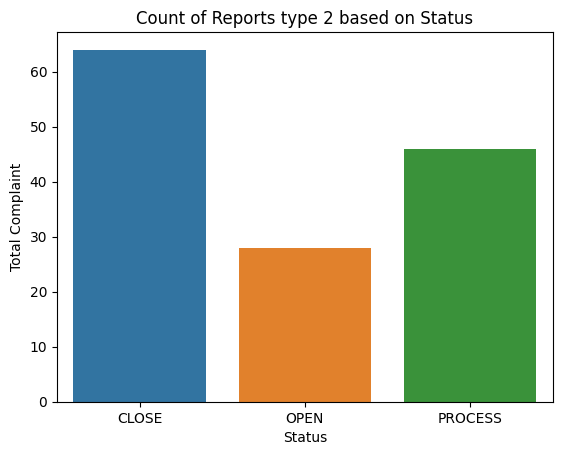

In [ ]:
sns.barplot(x='status',y='complaint_ID',data=type2_status)
plt.xlabel("Status")
plt.ylabel("Total Complaint")
plt.title("Count of Reports type 2 based on Status")
# display the plot
plt.show()

In [ ]:
# Jumlah mahasiswa yang report untuk department FNC berdasarkan gender
type2_gender = pd.pivot_table(
    data=type2,
    index='gender',
    values = 'complaint_ID',
    aggfunc = 'nunique'
).reset_index()

type2_gender

,gender,complaint_ID
0,F,73
1,M,65


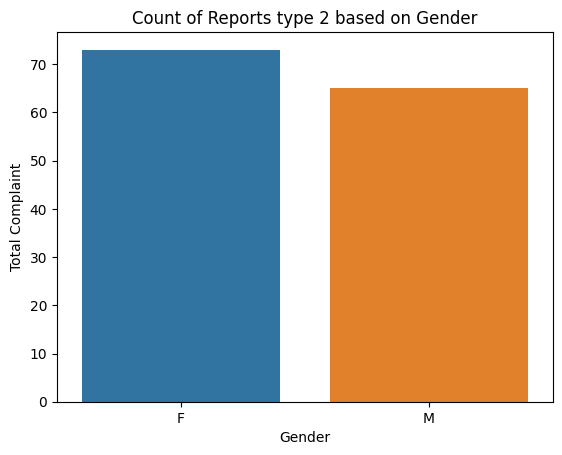

In [ ]:
sns.barplot(x='gender',y='complaint_ID',data=type2_gender)
plt.xlabel("Gender")
plt.ylabel("Total Complaint")
plt.title("Count of Reports type 2 based on Gender")
# display the plot
plt.show()

In [ ]:
# Jumlah report untuk department FNC berdasarkan tahun belajar
type2_year = pd.pivot_table(
    data=type2,
    index='year',
    values = 'complaint_ID',
    aggfunc = 'nunique'
).reset_index()

type2_year

,year,complaint_ID
0,1,28
1,2,28
2,3,34
3,4,22
4,5,26


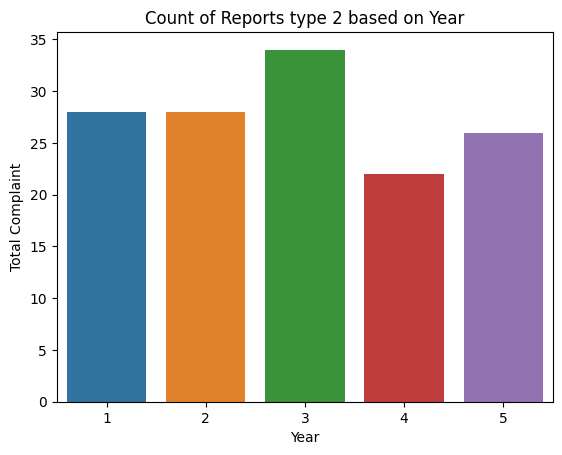

In [ ]:
sns.barplot(x='year',y='complaint_ID',data=type2_year)
plt.xlabel("Year")
plt.ylabel("Total Complaint")
plt.title("Count of Reports type 2 based on Year")
# display the plot
plt.show()

Mahasiswa yang melapor pada department FNC lebih beragam tahun belajarnya daripada department ASR. Mahasiswa tersebut didominasi oleh perempuan dan mahasiswa yang tahun belajarnya di angka 3.

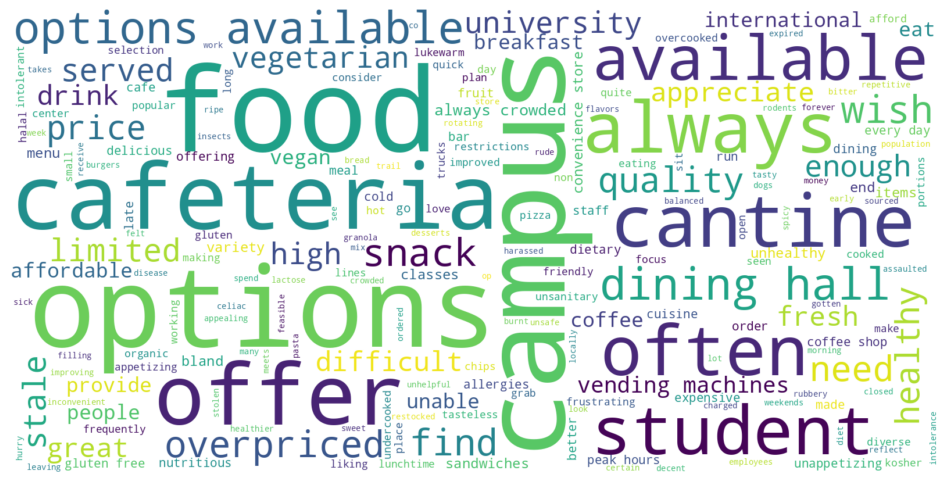

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white')
reports_segmen2 = ' '.join(type2['reports'])
wordcloud.generate(reports_segmen2)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
food = type2['reports'].str.contains('.food')
type2[food]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
14,C001796,FNC,"12. ""The cafeteria should offer more options f...",21.308086,1.38,2,1,F,PROCESS,Food and Cantines
21,C101991,FNC,26. I have been unable to find food that meets...,21.308086,1.16,4,1,M,PROCESS,Food and Cantines
171,C001731,FNC,"3.-""I-appreciate-the-variety-of-food-options-a...",17.000000,0.13,5,1,F,PROCESS,Food and Cantines
174,C001827,FNC,"25. ""The cafeteria should offer more internati...",18.000000,4.84,1,1,F,PROCESS,Food and Cantines
191,C001983,FNC,23. I have had my food stolen from me in the d...,18.000000,2.93,1,1,M,OPEN,Food and Cantines
231,C001792,FNC,"8. ""The food served in the campus cafe is ofte...",18.000000,3.98,3,1,F,CLOSE,Food and Cantines
239,C001851,FNC,"4. ""The food on campus is great, but the canti...",18.000000,4.14,3,1,F,PROCESS,Food and Cantines
240,C001979,FNC,16. The food is not filling.,18.000000,4.63,3,1,M,PROCESS,Food and Cantines
241,C101746,FNC,"16. ""I appreciate the campus food co-op, but t...",18.000000,4.47,3,1,M,PROCESS,Food and Cantines
300,C101982,FNC,20.-I-have-been-served-food-that-was-not-what-...,19.000000,2.03,2,1,M,CLOSE,Food and Cantines


In [ ]:
cook = type2['reports'].str.contains('.cook')
type2[cook]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
282,C001873,FNC,"16. ""The burgers in the cafeteria are always o...",19.0,1.87,1,1,F,PROCESS,Food and Cantines
302,C001882,FNC,"22. ""The pasta in the cafeteria is always over...",19.0,3.04,2,1,F,OPEN,Food and Cantines
467,C001998,FNC,30. I have been unable to find food that is co...,21.0,2.58,1,1,M,OPEN,Food and Cantines
490,C001972,FNC,12.-The-food-is-not-cooked-to-my-liking.,21.0,3.19,2,1,M,OPEN,Food and Cantines
576,C001921,FNC,"38. ""The pizza in the cafeteria is always unde...",22.0,4.56,2,1,F,CLOSE,Food and Cantines
698,C001777,FNC,"3. ""The food served in the cafeteria is not wo...",23.0,1.12,4,1,M,OPEN,Food and Cantines


In [ ]:
type2_process = type2[type2['status']=='PROCESS']
type2_process

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
14,C001796,FNC,"12. ""The cafeteria should offer more options f...",21.308086,1.38,2,1,F,PROCESS,Food and Cantines
21,C101991,FNC,26. I have been unable to find food that meets...,21.308086,1.16,4,1,M,PROCESS,Food and Cantines
171,C001731,FNC,"3.-""I-appreciate-the-variety-of-food-options-a...",17.000000,0.13,5,1,F,PROCESS,Food and Cantines
174,C001827,FNC,"25. ""The cafeteria should offer more internati...",18.000000,4.84,1,1,F,PROCESS,Food and Cantines
175,C001986,FNC,24. I have been harassed or assaulted in the d...,18.000000,2.06,1,1,M,PROCESS,Food and Cantines
232,C001846,FNC,"2. ""I wish there were more vegan options in th...",18.000000,4.49,3,1,F,PROCESS,Food and Cantines
234,C001937,FNC,"47. ""The hot dogs in the cafeteria are always ...",18.000000,1.65,3,1,M,PROCESS,Food and Cantines
239,C001851,FNC,"4. ""The food on campus is great, but the canti...",18.000000,4.14,3,1,F,PROCESS,Food and Cantines
240,C001979,FNC,16. The food is not filling.,18.000000,4.63,3,1,M,PROCESS,Food and Cantines
241,C101746,FNC,"16. ""I appreciate the campus food co-op, but t...",18.000000,4.47,3,1,M,PROCESS,Food and Cantines


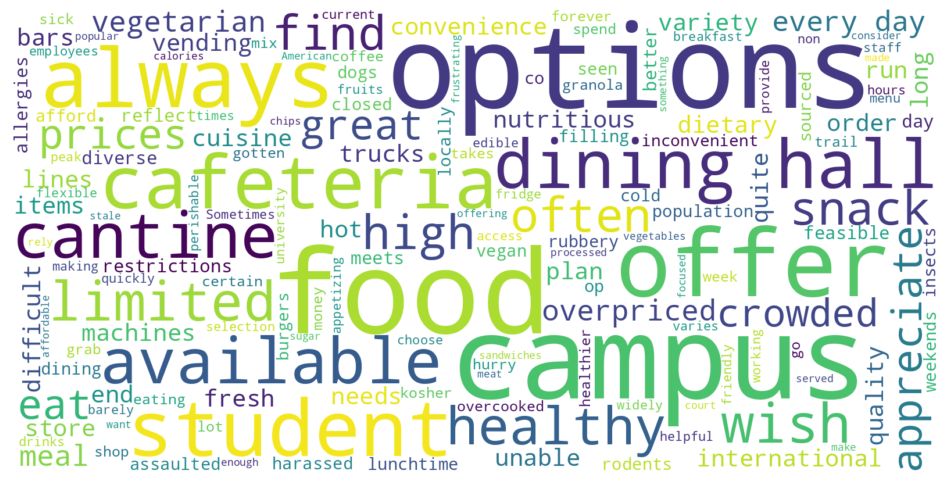

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white')
reports_segmen2_process = ' '.join(type2_process['reports'])
wordcloud.generate(reports_segmen2_process)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
crowded = type2_process['reports'].str.contains('.crowded')
type2_process[crowded]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
239,C001851,FNC,"4. ""The food on campus is great, but the canti...",18.0,4.14,3,1,F,PROCESS,Food and Cantines
294,C001961,FNC,4. The dining hall is always crowded and there...,19.0,3.46,1,1,M,PROCESS,Food and Cantines
393,C001734,FNC,"7. ""The campus coffee shop is always crowded, ...",20.0,3.88,2,1,M,PROCESS,Food and Cantines


In [ ]:
high = type2_process['reports'].str.contains('.high')
type2_process[high]

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,status,type_complaint
171,C001731,FNC,"3.-""I-appreciate-the-variety-of-food-options-a...",17.0,0.13,5,1,F,PROCESS,Food and Cantines
241,C101746,FNC,"16. ""I appreciate the campus food co-op, but t...",18.0,4.47,3,1,M,PROCESS,Food and Cantines
553,C001883,FNC,"23. ""The prices at the cantine are too high fo...",22.0,4.85,1,1,F,PROCESS,Food and Cantines
617,C001743,FNC,"15. ""The campus convenience store should offer...",22.0,2.92,4,1,M,PROCESS,Food and Cantines
